# MyAnimeList Database 2020

This dataset contains information about 17.562 anime and the preference from 325.772 different users. In particular, this dataset contain:

*   The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
*   Ratings given by users to the animes that they has watched completely.
*   Information about the anime like genre, stats, studio, etc.
*   HTML with anime information to do data scrapping. These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/melissafalcao/TAGDI/main/Dataset/anime.csv?token=AHWTHUH6XXTC4Y5MMNW6SNTA6M5EY", encoding ="UTF-8")
data2 = pd.read_csv("https://raw.githubusercontent.com/melissafalcao/TAGDI/main/Dataset/anime_with_synopsis.csv?token=AHWTHUB7IQAUPA4CM4XAUBLA6M5GO", encoding ="UTF-8")

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genders        17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [4]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genders    16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MAL_ID,17562.0,21477.192347,14900.093170,1.0,5953.5,22820.0,35624.75,48492.0
Popularity,17562.0,8763.452340,5059.327278,0.0,4383.5,8762.5,13145.00,17565.0
Members,17562.0,34658.539517,125282.141428,1.0,336.0,2065.0,13223.25,2589552.0
Favorites,17562.0,457.746270,4063.473313,0.0,0.0,3.0,31.00,183914.0
Watching,17562.0,2231.487758,14046.688133,0.0,13.0,73.0,522.00,887333.0
Completed,17562.0,22095.571347,91009.188504,0.0,111.0,817.5,6478.00,2182587.0
On-Hold,17562.0,955.049653,4275.675096,0.0,6.0,45.0,291.75,187919.0
Dropped,17562.0,1176.599533,4740.348653,0.0,37.0,77.0,271.00,174710.0
Plan to Watch,17562.0,8199.831227,23777.691963,1.0,112.0,752.5,4135.50,425531.0


diferença entre media e mediana quer dizer que tem valores mt grandes puxando pra cima ou pra baixo

In [6]:
#Isso aqui não funcionou bem não. Ele tirou os unk de Premiered. Quando gerei season e plotei os graficos da pra ver que agr ta sem unk

for (columnName, columnData) in data.iteritems():
    if(columnName != "MAL_ID" or columnName != "Premiered" or columnName != "Source" ):
      data.loc[data[columnName] == 'Unknown', columnName] = None

In [7]:
data['Name'] = data['Name'].astype('category')
data['Genders'] = data['Genders'].astype('category')
data['Score'] = data['Score'].astype('float64')
data['Type'] = data['Type'].astype('category')
data['Aired'] = data['Aired'].astype('category')
data['Producers'] = data['Producers'].astype('category')
data['Licensors'] = data['Licensors'].astype('category')
data['Studios'] = data['Studios'].astype('category')
data['Source'] = data['Source'].astype('category')
data['Rating'] = data['Rating'].astype('category')
data['Episodes'] = data['Episodes'].astype('float64')
data['Ranked'] = data['Ranked'].astype('float64')
data['Episodes'] = data['Episodes'].astype('float64')

data['Score-10'] = data['Score-10'].astype('float64')
data['Score-9'] = data['Score-9'].astype('float64')
data['Score-8'] = data['Score-8'].astype('float64')
data['Score-7'] = data['Score-7'].astype('float64')
data['Score-6'] = data['Score-6'].astype('float64')
data['Score-5'] = data['Score-5'].astype('float64')
data['Score-4'] = data['Score-4'].astype('float64')
data['Score-3'] = data['Score-3'].astype('float64')
data['Score-2'] = data['Score-2'].astype('float64')
data['Score-1'] = data['Score-1'].astype('float64')

#Pra passar de string pra int tem que passar pra float antes. Porque ta no formato do float.
#Se passar float pra int do jeito normal vai dar erro.
#É um problema do Numpy que não deixa fazer a conversao pra int se tiver None ou NaN.
#Tem esse metodo aí de uma atualização que pelas pesquisa vi que resolve. Mas não sei exatamente como ele se comporta.

data['Score-10'] = data['Score-10'].astype(pd.Int32Dtype()) 
data['Score-9'] = data['Score-9'].astype(pd.Int32Dtype())
data['Score-8'] = data['Score-8'].astype(pd.Int32Dtype())
data['Score-7'] = data['Score-7'].astype(pd.Int32Dtype())
data['Score-6'] = data['Score-6'].astype(pd.Int32Dtype())
data['Score-5'] = data['Score-5'].astype(pd.Int32Dtype())
data['Score-4'] = data['Score-4'].astype(pd.Int32Dtype())
data['Score-3'] = data['Score-3'].astype(pd.Int32Dtype())
data['Score-2'] = data['Score-2'].astype(pd.Int32Dtype())
data['Score-1'] = data['Score-1'].astype(pd.Int32Dtype())





In [8]:
print(data.isnull().sum())

MAL_ID               0
Name                 0
Score             5141
Genders             63
English name     10565
Japanese name       48
Type                37
Episodes           516
Aired              309
Premiered        12817
Producers         7794
Licensors        13616
Studios           7079
Source            3567
Duration           555
Rating             688
Ranked            1762
Popularity           0
Members              0
Favorites            0
Watching             0
Completed            0
On-Hold              0
Dropped              0
Plan to Watch        0
Score-10           437
Score-9           3167
Score-8           1371
Score-7            503
Score-6            511
Score-5            584
Score-4            977
Score-3           1307
Score-2           1597
Score-1            459
dtype: int64


In [9]:
#Verificando porcentagem de dados faltantes
(data.isnull().sum() / 17562) * 100


MAL_ID            0.000000
Name              0.000000
Score            29.273431
Genders           0.358729
English name     60.158296
Japanese name     0.273317
Type              0.210682
Episodes          2.938162
Aired             1.759481
Premiered        72.981437
Producers        44.379911
Licensors        77.531033
Studios          40.308621
Source           20.310899
Duration          3.160232
Rating            3.917549
Ranked           10.033026
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          2.488327
Score-9          18.033254
Score-8           7.806628
Score-7           2.864138
Score-6           2.909691
Score-5           3.325362
Score-4           5.563148
Score-3           7.442205
Score-2           9.093497
Score-1           2.613598
dtype: float64

In [10]:
#Premiered e Licensors foram removidas pois são colunas que apresentam mais de 70% dos dados faltando.
data.drop(columns=['English name', 'Japanese name', 'Premiered', 'Licensors'])

,MAL_ID,Name,Score,Genders,Type,Episodes,Aired,Producers,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1.0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5.0,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6.0,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7.0,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8.0,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312,529,1242,1713,1068,634,265,83,50,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481.0,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",ONA,NaN,"Apr 4, 2021 to ?",NaN,NaN,Novel,None,NaN,NaN,13116.0,354.0,6.0,0.0,0.0,0.0,0.0,354.0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
17558,48483.0,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",TV,NaN,2021 to ?,Kadokawa,Passione,Manga,None,NaN,NaN,17562.0,7010.0,70.0,14.0,0.0,14.0,0.0,6982.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
17559,48488.0,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",TV,NaN,"Jul, 2021 to ?",NaN,NaN,Visual novel,None,R - 17+ (violence & profanity),NaN,17558.0,11309.0,48.0,3.0,0.0,0.0,0.0,11306.0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
17560,48491.0,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",TV,NaN,NaN,Kadokawa,8bit,Manga,None,PG-13 - Teens 13 or older,NaN,17565.0,1386.0,2.0,13.0,2.0,2.0,1.0,1368.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [11]:
#Imputando a média em valores faltantes do Score
data.replace(to_replace=[None], value=6.509999, inplace=True)

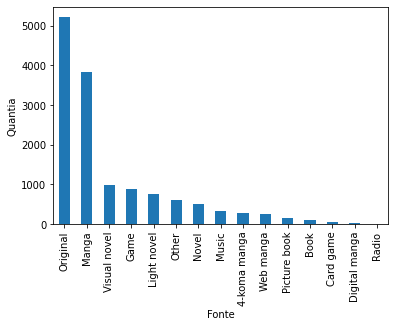

In [13]:
data['Source'].value_counts().plot(kind='bar', ylabel='Quantia', xlabel='Fonte')


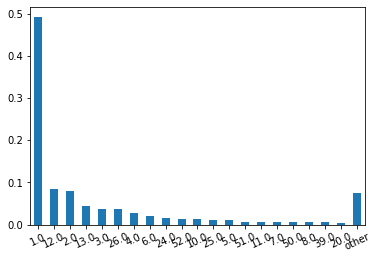

In [14]:
prob = data['Episodes'].value_counts(normalize=True)
threshold = 0.004
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

da pra fazer imputação de dados nesse unknown ^

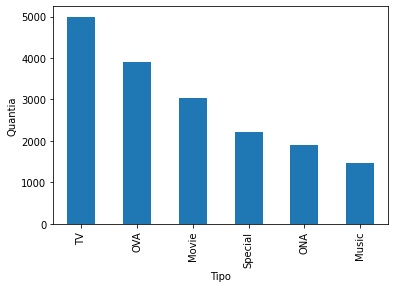

In [15]:
data['Type'].value_counts().plot(kind='bar', ylabel='Quantia', xlabel='Tipo')


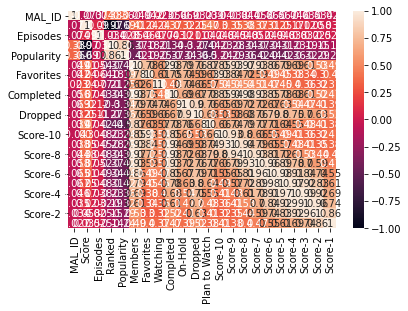

In [16]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

popularidade ta negativo porque é quanto menor melhor. mas no caso seria positivo na logica da correlação

# Relatório

MAL_ID

**Name**

Objeto contendo o nome da obra. Foi convertido para o tipo categoria.

**Score**

Esta coluna representa a nota geral da obra pela avaliação dos usuários. Era um object, convertemos para float para poder manipular melhor os dados. Tinhamos alguns casos de dados faltantes. Nesse caso, optamos por substituír-los pela média no escopo (6.509999), usando a estratégia de imputação de dados.

Genders

**English name**

Nome da obra em inglês. Não seria relevante para a aplicação, optamos por excluir a coluna.

**Japanese name**

Nome da obra em inglês. Não seria relevante para a aplicação, optamos por excluir a coluna.

Type

Episodes

Aired

**Premiered**

Os dados dessa coluna são compostos pela estação e o ano em que a obra foi lançada. Inicialmente pensamos em dividir essa informação em duas colunas separadas, pois poderiam ser trabalhadas individualmente. Porém vimos que a grande maioria eram dados faltantes, então optamos pela exclusão.

Producers

**Licensors**

Assim como em Premiered optamos pela exclusão pois temos mais de 70% dos dados faltando.

Studios

**Source**
 
Os dados dessa coluna são compostos pela fonte do material usado na obra. Como por exemplo, se foi original ou baseado em um mangá. Os dados nessa coluna estão limpos, sem viés de dados ou dados ausentes.

Duration

Rating

Ranked

Popularity

Members

Favorites

Watching

Completed

On-Hold

Dropped

Plan to Watch

Score-01 até Score-10

# Outras manipulações

**Unknown**

Trabalhamos individualmente este problema em cada coluna. Porém, para linhas que continham mais de x Unknowns inicialmente, achamos relevante remover essas instancias. *(apesar de que antes de remover seria interessante ver como a nota se comporta na media desses casos com mt unknowns)*